In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Carica i dati
data = pd.read_csv('worldcupallgoals.csv',encoding='latin1')
# Rimozione righe con valori nulli
data.dropna(inplace=True)

time_ticks = [year for year in range(1930, 2023, 4) if year not in (1942, 1946)]

## Goal Distribution by Match Period

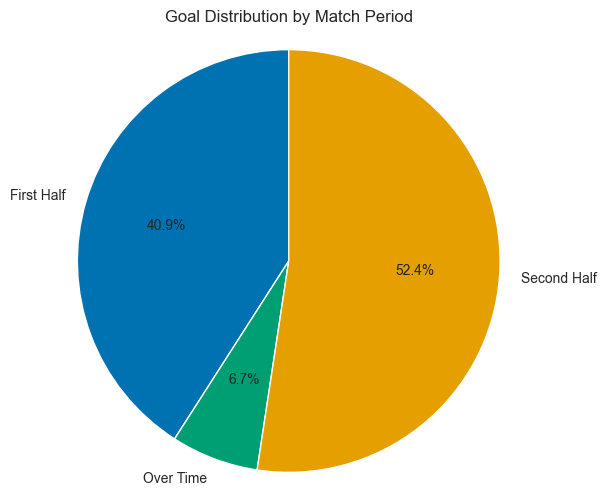

In [52]:
# Conta i goal nei tre periodi desiderati
first_half = (data['match_period'] == 'first half').sum()
second_half = (data['match_period'] == 'second half').sum()
over_time = (~data['match_period'].isin(['first half', 'second half'])).sum()

# Dati per il grafico
labels = ['First Half', 'Over Time','Second Half']
sizes = [first_half, over_time,second_half]
colors = ['#0072B2', '#009E73', '#E69F00']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Goal Distribution by Match Period")
plt.axis('equal')
plt.show()

## Top 5 teams by total goals scored

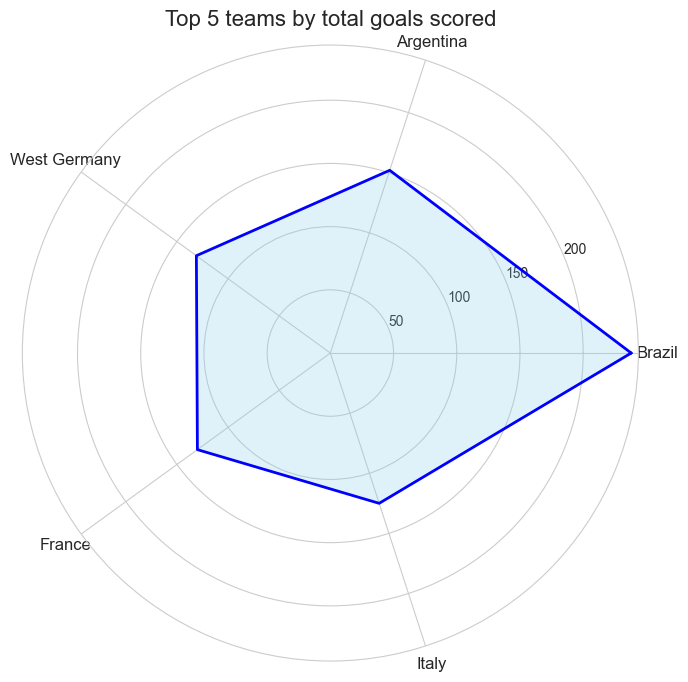

In [53]:
# Raggruppa per nazione (team) e somma i gol
gol_per_nazione = data.groupby('player_team_name')['goal_id'].count().sort_values(ascending=False)
top_nazioni = gol_per_nazione.head(5)

# Crea il grafico a radar
categories = top_nazioni.index.tolist()  
values = top_nazioni.values.tolist()

# Aggiungiamo il primo valore in fondo per chiudere il grafico
values.append(values[0])

# Aggiungiamo un angolo extra per chiudere il radar
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles.append(angles[0]) 

# Impostiamo il grafico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Aggiungi le etichette alle categorie
ax.set_xticks(angles[:-1])  # Imposta gli angoli senza duplicare il primo
ax.set_xticklabels(categories, fontsize=12)

plt.title('Top 5 teams by total goals scored', fontsize=16)
plt.show()

## Total goals by year

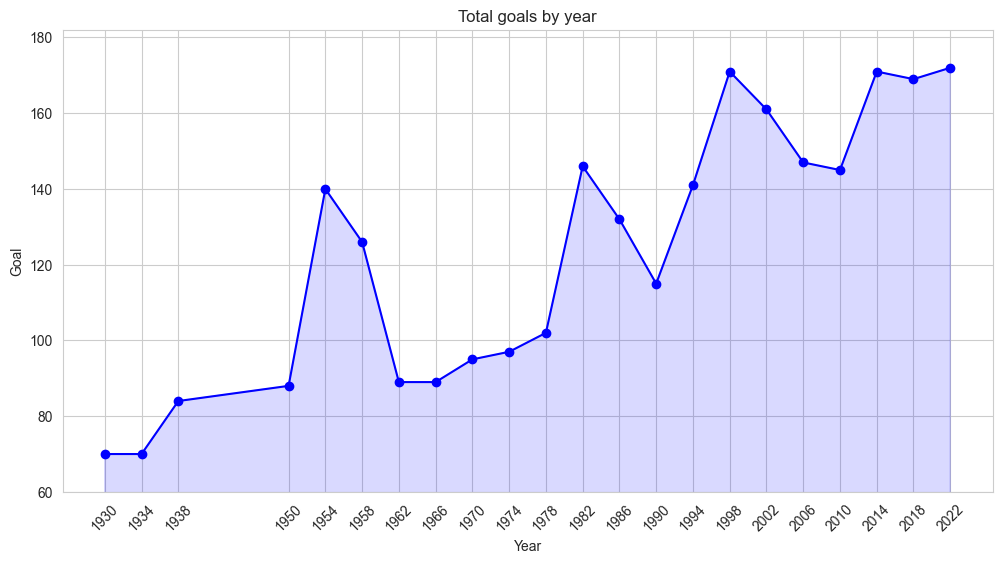

In [54]:
data['match_date'] = pd.to_datetime(data['match_date'])

# Estrai l'anno dalla data della partita
data['year'] = data['match_date'].dt.year

# Raggruppa per anno e conta i goal segnati (numero di righe con goal)
gol_per_anno = data.groupby('year').size()

plt.figure(figsize=(12, 6))
gol_per_anno.plot(kind='line', color='blue', marker='o')
plt.fill_between(gol_per_anno.index, gol_per_anno.values, color='blue', alpha=0.15)
plt.title('Total goals by year')
plt.xlabel('Year')
plt.ylabel('Goal')
plt.ylim(60, gol_per_anno.max() + 10)
plt.grid(True)
plt.xticks(ticks = time_ticks,rotation=45)
plt.show()

## Trend of Own Goals and Penalties

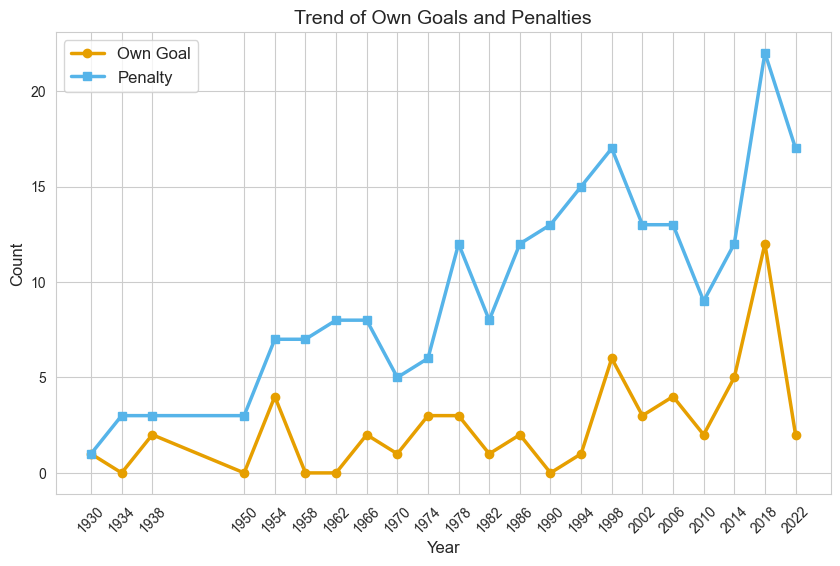

In [55]:
# Estrai l'anno dalla data della partita
data['year'] = pd.to_datetime(data['match_date']).dt.year
#aggreghiamo own goals e penalty
data_yearly = data.groupby('year')[['own_goal', 'penalty']].sum()

colors = {
    'own_goal': '#E69F00',    # arancione
    'penalty': '#56B4E9'      # blu chiaro
}

# Stile grafico
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

#Grafico autogoal
plt.plot(
    data_yearly.index, data_yearly['own_goal'],
    label='Own Goal', color=colors['own_goal'],
    linewidth=2.5, marker='o'
)
#Grafico rigori
plt.plot(
    data_yearly.index, data_yearly['penalty'],
    label='Penalty', color=colors['penalty'],
    linewidth=2.5, marker='s'
)

# Etichette e titolo
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Trend of Own Goals and Penalties', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(ticks=time_ticks,rotation=45)
plt.show()